In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

#Nate shared this list as his ultimate go-to during our regresssion hack-a-thon

In [2]:
df_ames_train = pd.read_csv('./datasets/train.csv')

I know I need to split my data into train/test before I do any data transformations and build any models.

In [3]:
df_ames_reg_train = df_ames_train[['Overall Qual','Neighborhood','SalePrice']]

In [4]:
df_ames_reg_train.shape

(2051, 3)

In [5]:
df_ames_reg_train.isna().sum()

Overall Qual    0
Neighborhood    0
SalePrice       0
dtype: int64

In [6]:

X = df_ames_reg_train[['Overall Qual','Neighborhood']]
y = df_ames_reg_train['SalePrice']
    

In [7]:
X.shape

(2051, 2)

In [8]:
y.shape

(2051,)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
X_train.dtypes

Overall Qual     int64
Neighborhood    object
dtype: object

In [11]:
ct1 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['Neighborhood', 'Overall Qual']),
    remainder='passthrough',
     verbose_feature_names_out=False)


In [12]:
pipe3 = make_pipeline(ct1, StandardScaler(with_mean=False), LinearRegression())

In [13]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [14]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood',
                                                   'Overall Qual'])],
                                   verbose_feature_names_out=False)),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [15]:
preds= pipe3.predict(X_test)

In [16]:
pipe3.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['Neighborhood', 'Overall Qual'])],
                   verbose_feature_names_out=False),
 'standardscaler': StandardScaler(with_mean=False),
 'linearregression': LinearRegression()}

In [17]:
#pd.DataFrame(lr.coef_.reshape(1, 2), columns=X.columns) 

In [18]:
cols_p3 = pipe3.named_steps.get('columntransformer').get_feature_names_out()
cols_p3

array(['Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Overall Qual_1',
       'Overall Qual_2', 'Overall Qual_3', 'Overall Qual_4',
       'Overall Qual_5', 'Overall Qual_6', 'Overall Qual_7',
       'Overall Qual_8', 'Overall Qual_9', 'Overall Qual_10'],
      dtype=object)

In [19]:
pipe3.named_steps['linearregression'].coef_

array([    90.29923833,  -2554.01447846,  -5245.65044234,  -5091.11322245,
         5410.39958434,   2434.21056136,   5022.79099424,  -6561.22365832,
         1202.3994177 ,   -956.02695457,   3427.44202582,  -6444.23715221,
         -789.88161447,  -3800.13566713,    785.17340805,  -3074.58735711,
        -3478.47364381,   3701.46159334,  11387.0251298 ,  10702.1807544 ,
        -7946.95074595,  -3328.10645062,  -2431.4830457 ,   2114.93653942,
         1018.97907034,   2704.73374495,   2644.71281248,   2928.7033367 ,
        -3656.4510661 ,  -7205.98574277,  -9201.98242582, -14364.21405035,
       -16620.44456024,  -6751.56089875,   4848.13534511,  19290.57370544,
        29656.89411846,  19477.6719601 ])

In [20]:
pd.DataFrame(zip(cols_p3, 
pipe3.named_steps['linearregression'].coef_))

,0,1
0,Neighborhood_Blmngtn,90.299238
1,Neighborhood_Blueste,-2554.014478
2,Neighborhood_BrDale,-5245.650442
3,Neighborhood_BrkSide,-5091.113222
4,Neighborhood_ClearCr,5410.399584
5,Neighborhood_CollgCr,2434.210561
6,Neighborhood_Crawfor,5022.790994
7,Neighborhood_Edwards,-6561.223658
8,Neighborhood_Gilbert,1202.399418
9,Neighborhood_Greens,-956.026955


In [21]:
residuals = preds - y_test
residuals

491    -34344.008691
1214    12150.483949
984     -6592.885106
586      1753.718010
607     -9913.434157
            ...     
1763   -64985.144475
1895     9056.584707
1905   -14635.583159
239      5331.228520
1638   -15081.347830
Name: SalePrice, Length: 513, dtype: float64

In [22]:
#Evaluate my metrics
print('Linear Regression Model #1 w/Categorical Vars: MAE:', mean_absolute_error(y_test, preds))
print('Linear Regression Model #1 w/Categorical Vars: MSE:', mean_squared_error(y_test, preds))
print('Linear Model #1 w/Categorical Vars: R2:', r2_score(y_test, preds))

Linear Regression Model #1 w/Categorical Vars: MAE: 28320.913390712336
Linear Regression Model #1 w/Categorical Vars: MSE: 1821540668.0853412
Linear Model #1 w/Categorical Vars: R2: 0.748041408455949


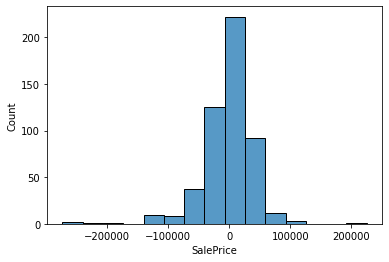

In [23]:
sns.histplot(residuals, bins=15);
#This looks like a normal distribution so this doesn't look too bad.

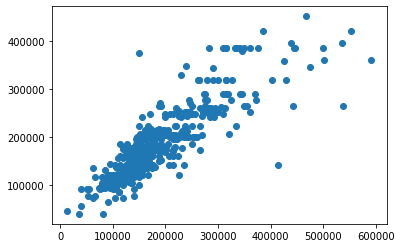

In [24]:
plt.scatter(y_test, preds);
#This doesn't look too bad!

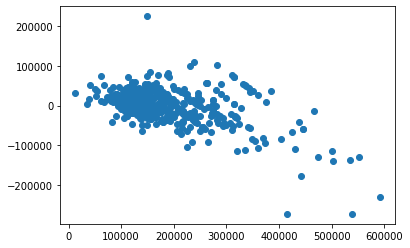

In [25]:
plt.scatter(y_test, residuals);


In [26]:
#Now, I want to use my Linear Regression model to score the separate test dataset so 
# that I can submit a csv file to Kaggle for the contest.

df_ames_test = pd.read_csv('./datasets/test.csv')

In [27]:
df_ames_test.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [28]:
#Pull off only the data I need
df_mini_lreg2_test = df_ames_test[['Overall Qual',  'Neighborhood']]

In [29]:
#Yay!  No missing data here!
df_mini_lreg2_test.isna().sum()

Overall Qual    0
Neighborhood    0
dtype: int64

In [30]:
X_mini_lreg2_test = df_mini_lreg2_test

In [31]:
preds_lr2_kag = pipe3.predict(X_mini_lreg2_test)

In [32]:
df_ames_test['SalePrice'] = preds_lr2_kag

In [33]:
df_ames_test[['Id', 'SalePrice']].to_csv('./datasets/predictions_lr2.csv', index = False)

#Used code from Chuck's Breakfast Hour Quiz3 Review

In [34]:
df_kaggle = pd.read_csv('./datasets/rdg_predictions_ohe.csv')

In [35]:
df_kaggle.head(2)

,Id,SalePrice
0,2658,133914.990982
1,2718,179090.045185
